In [5]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2
import calendar
import random
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Note : Cancelled orders shouldn't be considered for the analysis.

In [6]:
conn = psycopg2.connect(
    host='shopify-merchant-dump.ccm9mnr5avgs.ap-south-1.rds.amazonaws.com',
    port='5432',
    user='toffee_coffee_roasters_69e3f806d0674953afe3d3fb2f724c7c',
    password='toffee_coffee_roasters_69e3f806d0674953afe3d3fb2f724c7c_password',
    database='toffee_coffee_roasters_69e3f806d0674953afe3d3fb2f724c7c_db'
)

In [9]:
query1 = """select o.id as order_id,
            o.created_at::date as order_date,
            o.customer_id as user_id,
            oli.product_id as product_id,
            o.total_price as order_amount,
            oli.name as product_name,
            CASE
        WHEN cancelled_at IS NOT NULL THEN 'Cancelled'
         ELSE 'Delivered'
     END as order_status,
            oli.quantity as quantity,
            oli.price as sp
            from orders o
            join order_line_item oli on oli.order_id = o.id"""

In [10]:
data = pd.read_sql(query1, conn)

In [11]:
data["order_date"] = pd.to_datetime(data["order_date"])

In [12]:
data['WeekCount']=data['order_date'].dt.strftime('%y-w%U')

In [13]:
data = data.dropna()

In [14]:
#data = data[data['order_date'] >= '2021-01-01']

In [15]:
data=data.sort_values('order_date')
WeekList=data['WeekCount'].unique()

In [16]:
data

#data = data[data['order_date'] <= '2023-06-30']

,order_id,order_date,user_id,product_id,order_amount,product_name,order_status,quantity,sp,WeekCount
93138,2418150342794,2020-09-12,3.554806e+12,5.321692e+12,1.0,Cabernet Sauvignon - Wine Barrel Aged Coffee -...,Delivered,1,1699.0,20-w36
93136,2418151194762,2020-09-12,3.554806e+12,5.321692e+12,1.0,Cabernet Sauvignon - Wine Barrel Aged Coffee -...,Delivered,1,1699.0,20-w36
93135,2418154733706,2020-09-12,3.554806e+12,5.321692e+12,1.0,Cabernet Sauvignon - Wine Barrel Aged Coffee -...,Delivered,1,1699.0,20-w36
93134,2418155159690,2020-09-12,3.554806e+12,5.321692e+12,1.0,Cabernet Sauvignon - Wine Barrel Aged Coffee -...,Delivered,1,1699.0,20-w36
93133,2418214437002,2020-09-12,3.554806e+12,5.321692e+12,1.0,Cabernet Sauvignon - Wine Barrel Aged Coffee -...,Delivered,1,1699.0,20-w36
...,...,...,...,...,...,...,...,...,...,...
93166,5348030644362,2023-12-13,5.389093e+12,6.624082e+12,630.0,Blueberry Mocha - Speciality Blend - 250 gm / ...,Delivered,1,630.0,23-w50
93167,5348030644362,2023-12-13,5.389093e+12,5.321622e+12,630.0,Peaberry Coffee - Medium Roast - French Press ...,Delivered,1,630.0,23-w50
93168,5348013342858,2023-12-13,6.947950e+12,5.321602e+12,324.0,South Indian Traditional Filter Coffee - Dark ...,Delivered,1,299.0,23-w50
93155,5348148084874,2023-12-13,5.132398e+12,6.634144e+12,1524.0,Tanzania Coffee (From Mt Kilimanjaro) - Whole ...,Delivered,1,1499.0,23-w50


In [17]:
WeekList = WeekList.tolist()
output_list = []

for i in range(len(WeekList) - 1):
    output_list.append(WeekList[i])
    current_week = int(WeekList[i].split('-w')[1])
    next_week = int(WeekList[i + 1].split('-w')[1])
    missing_weeks = next_week - current_week - 1
    for j in range(1, missing_weeks + 1):
        missing_week = current_week + j
        output_list.append(f'{WeekList[i][:5]}w{missing_week:02d}')

output_list.append(WeekList[-1])

In [18]:
data

,order_id,order_date,user_id,product_id,order_amount,product_name,order_status,quantity,sp,WeekCount
93138,2418150342794,2020-09-12,3.554806e+12,5.321692e+12,1.0,Cabernet Sauvignon - Wine Barrel Aged Coffee -...,Delivered,1,1699.0,20-w36
93136,2418151194762,2020-09-12,3.554806e+12,5.321692e+12,1.0,Cabernet Sauvignon - Wine Barrel Aged Coffee -...,Delivered,1,1699.0,20-w36
93135,2418154733706,2020-09-12,3.554806e+12,5.321692e+12,1.0,Cabernet Sauvignon - Wine Barrel Aged Coffee -...,Delivered,1,1699.0,20-w36
93134,2418155159690,2020-09-12,3.554806e+12,5.321692e+12,1.0,Cabernet Sauvignon - Wine Barrel Aged Coffee -...,Delivered,1,1699.0,20-w36
93133,2418214437002,2020-09-12,3.554806e+12,5.321692e+12,1.0,Cabernet Sauvignon - Wine Barrel Aged Coffee -...,Delivered,1,1699.0,20-w36
...,...,...,...,...,...,...,...,...,...,...
93166,5348030644362,2023-12-13,5.389093e+12,6.624082e+12,630.0,Blueberry Mocha - Speciality Blend - 250 gm / ...,Delivered,1,630.0,23-w50
93167,5348030644362,2023-12-13,5.389093e+12,5.321622e+12,630.0,Peaberry Coffee - Medium Roast - French Press ...,Delivered,1,630.0,23-w50
93168,5348013342858,2023-12-13,6.947950e+12,5.321602e+12,324.0,South Indian Traditional Filter Coffee - Dark ...,Delivered,1,299.0,23-w50
93155,5348148084874,2023-12-13,5.132398e+12,6.634144e+12,1524.0,Tanzania Coffee (From Mt Kilimanjaro) - Whole ...,Delivered,1,1499.0,23-w50


In [19]:
orderuserlevel=data.groupby(['order_id','user_id']).agg(
          order_date=pd.NamedAgg(column='order_date', aggfunc='min'),

    ).reset_index()
orderuserlevel=orderuserlevel.sort_values('order_date')
orderuserlevel['TrxnRank'] = orderuserlevel.groupby('user_id')['order_date'].rank(method='first')
orderuserlevel


data=pd.merge(data,
         orderuserlevel[['order_id','TrxnRank']],
         on="order_id",
         how ='left')
data['New']=0
data['Repeat']=0
data.loc[data['TrxnRank']==1,'New']=1
data.loc[data['TrxnRank']>1,'Repeat']=1

#AOV Contribution
data['ordervalue']=data['quantity']*data['sp']
data['AOVContribution']=data['ordervalue']/data["order_id"].nunique()
data['DeltaDaysinOrders']=(data.groupby('user_id').order_date.shift() - data.order_date).dt.days.abs()
data['DeltaOrderValues']=(data.groupby('user_id').ordervalue.shift() - data.ordervalue)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84090 entries, 0 to 84089
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           84090 non-null  int64         
 1   order_date         84090 non-null  datetime64[ns]
 2   user_id            84090 non-null  float64       
 3   product_id         84090 non-null  float64       
 4   order_amount       84090 non-null  float64       
 5   product_name       84090 non-null  object        
 6   order_status       84090 non-null  object        
 7   quantity           84090 non-null  int64         
 8   sp                 84090 non-null  float64       
 9   WeekCount          84090 non-null  object        
 10  TrxnRank           84090 non-null  float64       
 11  New                84090 non-null  int64         
 12  Repeat             84090 non-null  int64         
 13  ordervalue         84090 non-null  float64       
 14  AOVCon

In [21]:
data = data[data['order_status'] != 'Cancelled']

In [22]:
data[data["user_id"] == 6404056318126]

,order_id,order_date,user_id,product_id,order_amount,product_name,order_status,quantity,sp,WeekCount,TrxnRank,New,Repeat,ordervalue,AOVContribution,DeltaDaysinOrders,DeltaOrderValues


In [23]:
data[data["user_id"] == 6405566169262]

,order_id,order_date,user_id,product_id,order_amount,product_name,order_status,quantity,sp,WeekCount,TrxnRank,New,Repeat,ordervalue,AOVContribution,DeltaDaysinOrders,DeltaOrderValues


In [24]:
data[data["user_id"] == 6405566169262]

,order_id,order_date,user_id,product_id,order_amount,product_name,order_status,quantity,sp,WeekCount,TrxnRank,New,Repeat,ordervalue,AOVContribution,DeltaDaysinOrders,DeltaOrderValues


In [25]:
weeklyusersegsats = {}
for x in output_list:
  x3 = data[data['WeekCount'] <= x]
  try:
    userweeklydata = x3.groupby("user_id").agg(
          Last_Date=pd.NamedAgg(column='order_date', aggfunc= lambda x: x.nlargest(1).min()),
          First_Date=pd.NamedAgg(column='order_date', aggfunc='min'),
          OrdersCount=pd.NamedAgg(column='order_id', aggfunc='nunique'),
          Frequency=pd.NamedAgg(column='order_id', aggfunc='nunique'),
          Order_Value=pd.NamedAgg(column='ordervalue', aggfunc='sum'),
          Mean_Days_Delta=pd.NamedAgg(column='DeltaDaysinOrders', aggfunc='mean'),
          Mean_OV_Delta=pd.NamedAgg(column='DeltaOrderValues', aggfunc='mean')
          ).reset_index()

    globalmaxdateweek=x3['order_date'].max()
    userweeklydata['Recency']=globalmaxdateweek-userweeklydata['Last_Date']
    userweeklydata['Recency']=userweeklydata['Recency'].dt.days.abs()
    userweeklydata['Activated_Quater']=userweeklydata['First_Date'].dt.to_period('Q')
    userweeklydata['MaturityAge']=np.nan
    userweeklydata.loc[userweeklydata['Frequency']>1,"MaturityAge"]=(userweeklydata['Last_Date']-userweeklydata['First_Date']).dt.days.abs()
    userweeklydata['Mean_Days_Delta']=userweeklydata['Mean_Days_Delta'].fillna(0)
    userweeklydata['Mean_OV_Delta']=userweeklydata['Mean_OV_Delta'].fillna(0)
    userweeklydata['Customer_AOV']=userweeklydata['Order_Value']/userweeklydata['OrdersCount']

    r_labels, f_labels,AOV_labels, m_labels,DelAOV_labels = range(4, 0, -1), range(1,5), range(1,5),range(1,5),range(1,5)
    userweeklydata['f_score'] = userweeklydata['OrdersCount'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = f_labels)).astype('int64')
    userweeklydata['r_score'] = userweeklydata['Recency'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = r_labels)).astype('int64')
    userweeklydata['AOV_score'] = userweeklydata['Customer_AOV'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = AOV_labels)).astype('int64')
    userweeklydata['m_score']=0
    userweeklydata.loc[userweeklydata['MaturityAge'].notnull(),'m_score']= userweeklydata.loc[userweeklydata['MaturityAge'].notnull()]['MaturityAge'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = m_labels)).astype('int64')
    userweeklydata['DelAOV'] = userweeklydata['Mean_OV_Delta'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = DelAOV_labels)).astype('int64')
    userweeklydata['SumScore'] = userweeklydata['r_score'] + userweeklydata['m_score'] + userweeklydata['AOV_score']+ userweeklydata['DelAOV'] +userweeklydata['f_score']

    def CohortLables_3(df):
      if ((df['Frequency']==1) & (df['r_score']>2)):
          return "New"
      elif ((df['Frequency'] == 1) & (df['r_score'] <= 2)):
          return 'Churned (Single Use Only)'
      elif ((df['Frequency'] > 1) & (df['m_score'] < 3) & (df['r_score'] >2)):
          return 'Recent & Loyals'
      elif ((df['Frequency'] > 1) & (df['m_score'] >=3) & (df['r_score'] > 2)):
          return 'Champions'
      else:
          return 'Churned (Repeat Use)'
    userweeklydata['CohortLabel'] = userweeklydata.apply(CohortLables_3, axis=1)

    usersegstats=userweeklydata.groupby(
      'CohortLabel'
    ).agg(
          Users=pd.NamedAgg(column='user_id', aggfunc='nunique'),
          Orders=pd.NamedAgg(column='OrdersCount', aggfunc='sum'),
          Recency=pd.NamedAgg(column='Recency', aggfunc='mean'),
          OrderValue=pd.NamedAgg(column='Order_Value', aggfunc='sum'),
          MeanDaysDelta=pd.NamedAgg(column='Mean_Days_Delta', aggfunc='mean'),
          MeanOVDelta=pd.NamedAgg(column='Mean_OV_Delta', aggfunc='mean'),
          Maturity=pd.NamedAgg(column='MaturityAge', aggfunc='mean'),
    )

    usersegstats["Frequency"] = usersegstats["Orders"] / usersegstats["Users"]
    usersegstats["AOVContribution"] = usersegstats["OrderValue"] / usersegstats["Orders"].sum()
    usersegstats["AOV"] = usersegstats["OrderValue"] / usersegstats["Orders"]
    user_cohort_labels = ['New', 'Churned (Single Use Only)', 'Recent & Loyals', 'Champions', 'Churned (Repeat Use)']
    var_list = ['Users', 'Orders', 'Recency', 'AOVContribution', 'OrderValue','MeanDaysDelta', 'MeanOVDelta', 'Maturity', 'Frequency', 'AOV']
    dummy_df = pd.DataFrame(index=user_cohort_labels, columns=var_list)
    for i in user_cohort_labels:
      try:
        dummy_df.loc[i] = usersegstats.loc[i]
      except:
        pass
    dummy_df = dummy_df.fillna(0)
    usersegstats = dummy_df
    print(usersegstats)
    weeklyusersegsats[x] = usersegstats
  except:
    pass

                           Users  Orders   Recency  AOVContribution  \
New                        306.0   306.0  1.486928       270.523810   
Churned (Single Use Only)  328.0   328.0  2.658537       289.727891   
Recent & Loyals             12.0    25.0  1.500000        22.108844   
Champions                   19.0    46.0  1.157895        40.680272   
Churned (Repeat Use)         9.0    30.0  3.111111        35.093878   

                           OrderValue  MeanDaysDelta  MeanOVDelta  Maturity  \
New                          198835.0       0.000000     0.000000  0.000000   
Churned (Single Use Only)    212950.0       0.000000     0.000000  0.000000   
Recent & Loyals               16250.0       0.000000     0.000000  0.000000   
Champions                     29900.0       1.464912     0.000000  1.526316   
Churned (Repeat Use)          25794.0       0.031746    16.650794  0.222222   

                           Frequency         AOV  
New                         1.000000  649.78758

In [26]:
usersegstats

,Users,Orders,Recency,AOVContribution,OrderValue,MeanDaysDelta,MeanOVDelta,Maturity,Frequency,AOV
New,16962.0,16962.0,98.318182,134.086316,8276746.0,0.002682,-1.660762,0.000000,1.000000,487.958142
Churned (Single Use Only),18576.0,18576.0,552.880706,326.559852,20157560.0,0.028410,3.335224,0.000000,1.000000,1085.139966
Recent & Loyals,2365.0,5396.0,85.695137,53.041619,3274100.0,16.724678,-40.963442,24.274841,2.281607,606.764270
Champions,2679.0,11417.0,98.873834,263.201452,16246636.0,86.866659,-23.855999,326.172079,4.261665,1423.021459
Churned (Repeat Use),3429.0,9376.0,512.815106,200.704408,12388881.0,61.698512,-33.851757,157.424030,2.734325,1321.339697


In [27]:
userweeklydata[userweeklydata['CohortLabel']=='Recent & Loyals']

,user_id,Last_Date,First_Date,OrdersCount,Frequency,Order_Value,Mean_Days_Delta,Mean_OV_Delta,Recency,Activated_Quater,MaturityAge,Customer_AOV,f_score,r_score,AOV_score,m_score,DelAOV,SumScore,CohortLabel
1895,3.660581e+12,2023-06-28,2023-06-28,2,2,3490.0,0.000000,133.333333,168,2023Q2,0.0,1745.000000,4,3,4,1,4,16,Recent & Loyals
2437,3.685691e+12,2023-07-07,2023-07-07,2,2,2297.0,0.000000,33.333333,159,2023Q3,0.0,1148.500000,4,3,3,1,4,15,Recent & Loyals
3357,5.057566e+12,2023-09-11,2023-07-26,3,3,3695.0,9.400000,-20.000000,93,2023Q3,47.0,1231.666667,4,3,4,2,1,14,Recent & Loyals
3368,5.058281e+12,2023-07-29,2023-06-20,2,2,2470.0,39.000000,-130.000000,137,2023Q2,39.0,1235.000000,4,3,4,2,1,14,Recent & Loyals
4469,5.149082e+12,2023-07-28,2023-06-24,2,2,5139.0,11.333333,-119.666667,138,2023Q2,34.0,2569.500000,4,3,4,2,1,14,Recent & Loyals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43890,6.939579e+12,2023-12-12,2023-12-10,2,2,498.0,2.000000,-100.000000,1,2023Q4,2.0,249.000000,4,4,1,1,1,11,Recent & Loyals
43948,6.941112e+12,2023-12-12,2023-12-11,2,2,1260.0,1.000000,0.000000,1,2023Q4,1.0,630.000000,4,4,3,1,4,16,Recent & Loyals
43951,6.941205e+12,2023-12-11,2023-12-11,2,2,453.0,0.000000,-72.000000,2,2023Q4,0.0,226.500000,4,4,1,1,1,11,Recent & Loyals
43959,6.943113e+12,2023-12-13,2023-12-12,2,2,598.0,1.000000,0.000000,0,2023Q4,1.0,299.000000,4,4,2,1,4,15,Recent & Loyals


In [28]:
weeklyusersegsats['23-w35']

,Users,Orders,Recency,AOVContribution,OrderValue,MeanDaysDelta,MeanOVDelta,Maturity,Frequency,AOV
New,12910.0,12910.0,105.099380,221.710354,10407084.0,0.002014,2.797222,0.000000,1.000000,806.125794
Churned (Single Use Only),14240.0,14240.0,528.525492,326.142203,15309115.0,0.036078,-0.038701,0.000000,1.000000,1075.078301
Recent & Loyals,1696.0,3874.0,108.287736,92.770409,4354643.0,16.959850,-38.394763,33.931604,2.284198,1124.068921
Champions,2132.0,9089.0,94.545028,290.250660,13624366.0,87.793574,-20.005589,342.401501,4.263133,1498.995049
Churned (Repeat Use),2498.0,6827.0,498.431545,186.209054,8740653.0,63.781169,-30.272456,152.063651,2.732986,1280.306577


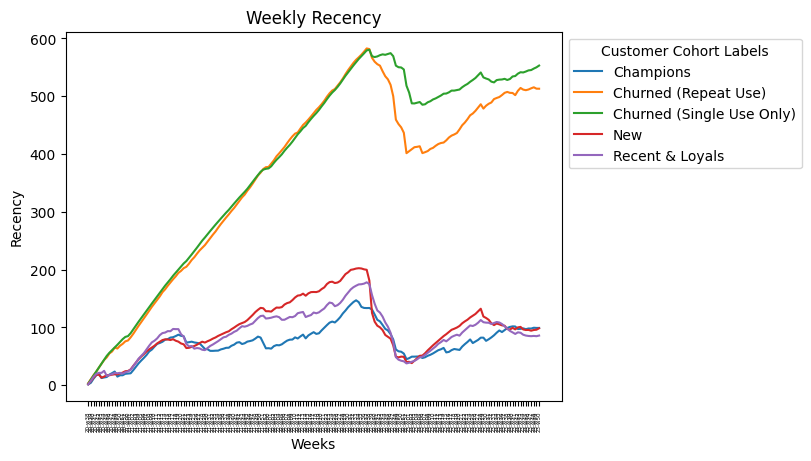

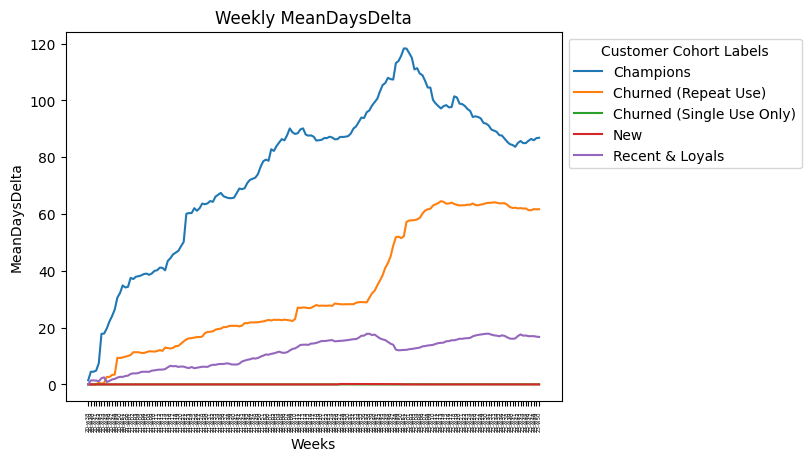

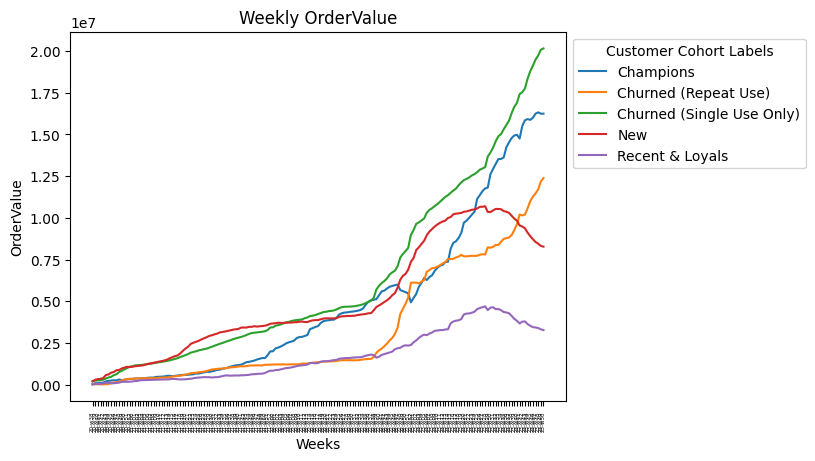

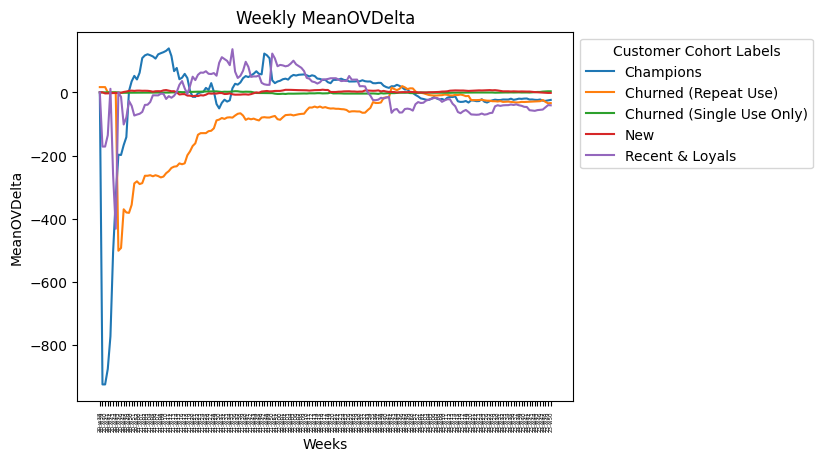

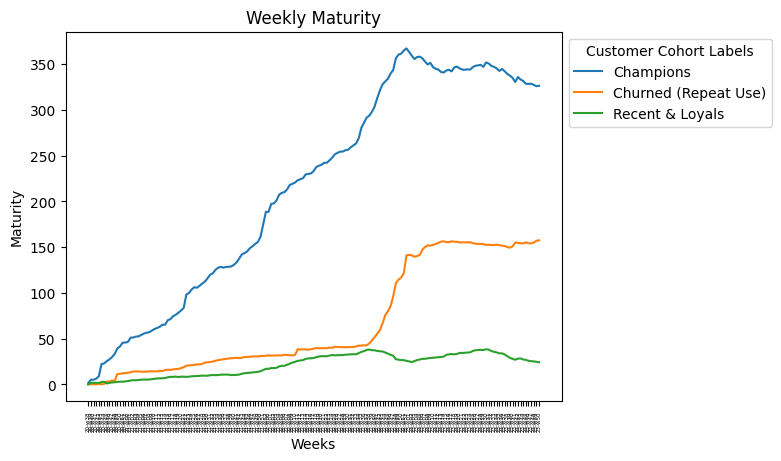

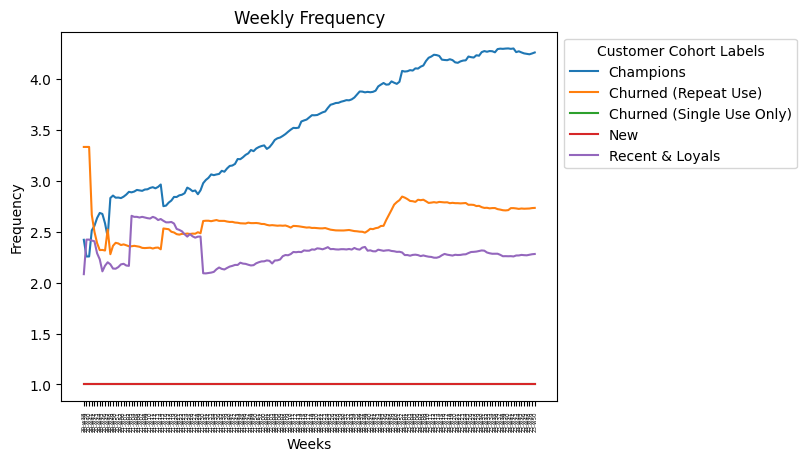

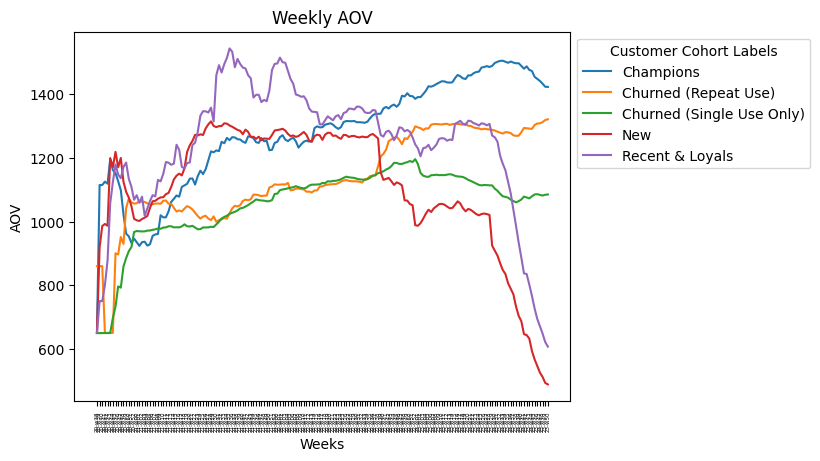

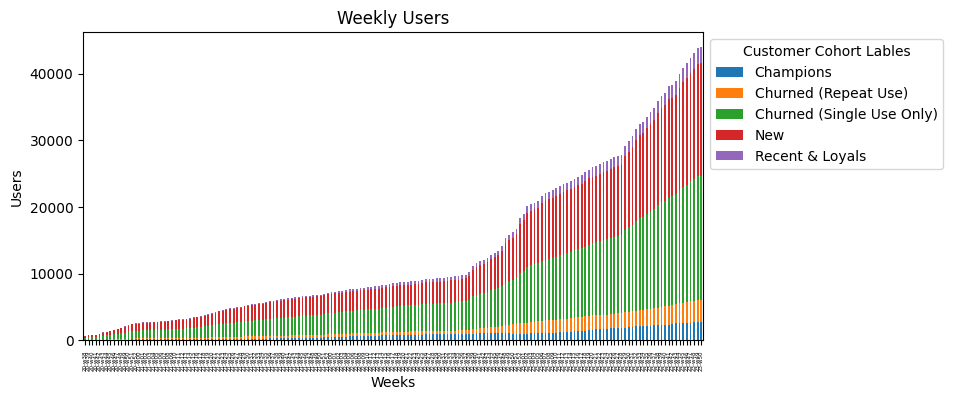

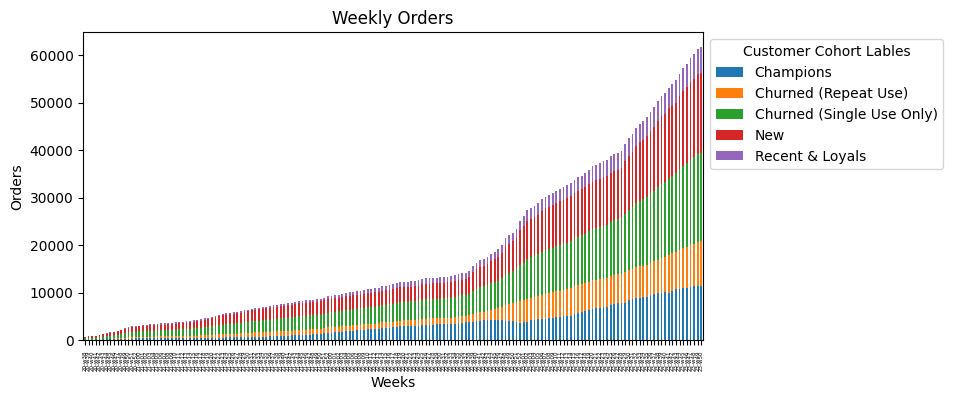

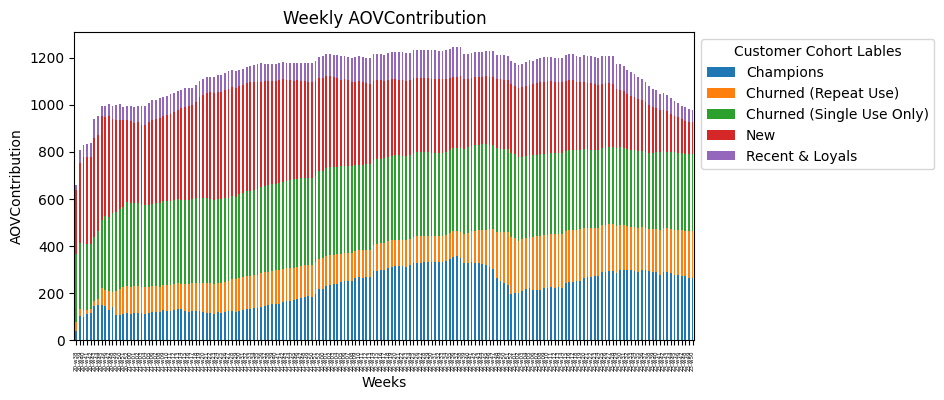

In [29]:
each_metric_df = {}
ListofCustomerCohortVariables = usersegstats.columns.to_list()
Line_Chart_Variable_List_Customer = ['Recency', 'OrderValue', 'MeanDaysDelta', 'MeanOVDelta', 'Maturity', 'Frequency', 'AOV']
Stack_Chart_Variable_List_Customer = ['Users', 'Orders', 'AOVContribution']
user_cohort_labels = ['Champions', 'Churned (Repeat Use)', 'Churned (Single Use Only)', 'New', 'Recent & Loyals']
for week, df in weeklyusersegsats.items():
    df.sort_index(inplace=True)


def metric_graph(metric):
    if metric in Line_Chart_Variable_List_Customer:
        column_df = pd.DataFrame({week: df[metric].tolist() for week, df in weeklyusersegsats.items()})
        column_df.index = user_cohort_labels
        column_transposed = column_df.transpose()
        insights_table = column_transposed
        # print(Line_Chart_Table)
        each_metric_df[metric] = column_transposed
        weeks = column_transposed.index.to_list()

        for column_name, values in column_transposed.items():
            # Skip plotting if any value in the column is zero
            if not all(value == 0 for value in values):
                plt.plot(weeks, values, label=column_name)

        plt.xlabel('Weeks')
        plt.ylabel(metric)
        plt.title(f'{metric}')
        plt.xticks(fontsize=4, rotation=90)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Customer Cohort Labels')
        plt.show()

    if metric in Stack_Chart_Variable_List_Customer:
      variable_df = pd.DataFrame({week: df[metric].tolist() for week, df in weeklyusersegsats.items()})
      variable_df.index = user_cohort_labels
      variable_df_transposed = variable_df.transpose()
      each_metric_df[metric] = variable_df_transposed
      insights_table = variable_df_transposed
      # print(Stack_Chart_Table)
      variable_df_transposed.plot(kind='bar', stacked=True, figsize=(8, 4))
      plt.title(f'{metric}')
      plt.xticks(fontsize=4)
      plt.xlabel('Weeks')
      plt.ylabel(metric)
      plt.legend(loc='upper left', bbox_to_anchor=(1,1), title = 'Customer Cohort Lables')
      plt.show()
    return insights_table

result = metric_graph('Recency')
result_1 = metric_graph('MeanDaysDelta')
result_2 = metric_graph('OrderValue')
result_3 = metric_graph('MeanOVDelta')
result_4 = metric_graph('Maturity')
result_5 = metric_graph('Frequency')
result_6 = metric_graph('AOV')
result_7 = metric_graph('Users')
result_8 = metric_graph('Orders')
result_9 = metric_graph('AOVContribution')

In [30]:
# file_path = 'output.xlsx'

# with pd.ExcelWriter(file_path) as writer:
#     startrow = 0
#     for dataframe in [result, result_1, result_2, result_3, result_4, result_5, result_6, result_7, result_8, result_9]:
#         dataframe.to_excel(writer, sheet_name='Sheet1', startrow=startrow, startcol=0, index=False)
#         startrow += dataframe.shape[0] + 1


In [31]:
result

,Champions,Churned (Repeat Use),Churned (Single Use Only),New,Recent & Loyals
20-w38,1.157895,3.111111,2.658537,1.486928,1.500000
20-w39,4.000000,10.111111,9.576000,6.773994,7.230769
20-w40,11.000000,17.111111,16.552430,12.648968,14.230769
20-w41,16.702703,23.000000,23.526829,17.641243,19.137931
20-w42,20.627907,30.000000,30.442765,18.070000,21.250000
...,...,...,...,...,...
23-w46,97.951886,511.448276,544.520736,95.479407,85.005939
23-w47,97.802790,513.513076,545.067238,94.120872,84.655861
23-w48,99.226900,515.291743,547.667982,95.377096,85.081526
23-w49,98.887854,512.901450,549.833225,95.796504,84.607341


In [32]:
result_1

,Champions,Churned (Repeat Use),Churned (Single Use Only),New,Recent & Loyals
20-w38,1.464912,0.031746,0.000000,0.000000,0.000000
20-w39,4.476190,0.031746,0.000000,0.000000,1.413462
20-w40,4.476190,0.031746,0.000000,0.000000,1.413462
20-w41,4.862613,0.000000,0.000000,0.000000,1.353448
20-w42,7.477200,0.666667,0.000000,0.000000,1.132812
...,...,...,...,...,...
23-w46,85.804318,61.401309,0.029982,0.001346,16.994711
23-w47,86.460659,61.341118,0.029350,0.001320,17.007960
23-w48,85.999082,61.746579,0.028934,0.001301,17.000720
23-w49,86.753498,61.648992,0.028493,0.002696,16.821993


In [33]:
result_2

,Champions,Churned (Repeat Use),Churned (Single Use Only),New,Recent & Loyals
20-w38,29900.0,25794.0,212950.0,198835.0,16250.0
20-w39,88065.0,25794.0,243500.0,296732.0,47244.0
20-w40,88065.0,25794.0,253900.0,334197.0,47244.0
20-w41,104658.0,15600.0,266250.0,351284.0,55990.0
20-w42,123080.0,19500.0,300635.0,394680.0,67583.0
...,...,...,...,...,...
23-w46,15999827.0,11273818.0,19114827.0,8719932.0,3448607.0
23-w47,16246294.0,11467337.0,19486223.0,8556673.0,3429435.0
23-w48,16325337.0,11709377.0,19730956.0,8453304.0,3398082.0
23-w49,16247495.0,12179707.0,20079859.0,8316637.0,3317835.0


In [34]:
result_3

,Champions,Churned (Repeat Use),Churned (Single Use Only),New,Recent & Loyals
20-w38,0.000000,16.650794,0.000000,0.000000,0.000000
20-w39,-924.119048,16.650794,0.000000,0.000000,-171.471154
20-w40,-924.119048,16.650794,0.000000,-3.286136,-171.471154
20-w41,-874.970721,0.000000,0.000000,-3.146893,-135.646552
20-w42,-771.925217,0.000000,0.000000,-2.585000,11.320312
...,...,...,...,...,...
23-w46,-22.612239,-27.879760,1.288360,0.084787,-55.094868
23-w47,-26.287744,-24.264609,2.426815,-0.824387,-54.398349
23-w48,-26.920556,-29.960515,3.077022,-1.513585,-47.176654
23-w49,-25.295266,-34.571734,3.392729,-1.762954,-40.348879


In [35]:
result_4

,Champions,Churned (Repeat Use),Churned (Single Use Only),New,Recent & Loyals
20-w38,1.526316,0.222222,0.0,0.0,0.000000
20-w39,5.142857,0.222222,0.0,0.0,1.769231
20-w40,5.142857,0.222222,0.0,0.0,1.769231
20-w41,6.243243,0.000000,0.0,0.0,1.758621
20-w42,8.837209,0.666667,0.0,0.0,1.531250
...,...,...,...,...,...
23-w46,328.251347,154.227143,0.0,0.0,25.820923
23-w47,328.469080,154.150374,0.0,0.0,25.402753
23-w48,327.179955,154.975229,0.0,0.0,25.113183
23-w49,325.743666,156.854099,0.0,0.0,24.651729


In [36]:
result_5

,Champions,Churned (Repeat Use),Churned (Single Use Only),New,Recent & Loyals
20-w38,2.421053,3.333333,1.0,1.0,2.083333
20-w39,2.257143,3.333333,1.0,1.0,2.423077
20-w40,2.257143,3.333333,1.0,1.0,2.423077
20-w41,2.513514,2.666667,1.0,1.0,2.413793
20-w42,2.558140,2.500000,1.0,1.0,2.406250
...,...,...,...,...,...
23-w46,4.252502,2.726352,1.0,1.0,2.269986
23-w47,4.248492,2.727895,1.0,1.0,2.268650
23-w48,4.243666,2.728440,1.0,1.0,2.274068
23-w49,4.251863,2.732761,1.0,1.0,2.279129


In [37]:
result_6

,Champions,Churned (Repeat Use),Churned (Single Use Only),New,Recent & Loyals
20-w38,650.000000,859.800000,649.237805,649.787582,650.000000
20-w39,1114.746835,859.800000,649.333333,918.674923,749.904762
20-w40,1114.746835,859.800000,649.360614,985.831858,749.904762
20-w41,1125.354839,650.000000,649.390244,992.327684,799.857143
20-w42,1118.909091,650.000000,649.319654,986.700000,877.701299
...,...,...,...,...,...
23-w46,1448.210264,1308.171037,1085.946313,545.814472,694.024351
23-w47,1441.936097,1308.757932,1083.711863,525.271516,671.253670
23-w48,1433.304390,1312.416162,1081.741009,511.670238,647.994279
23-w49,1423.720207,1319.006606,1084.108574,492.837748,621.317416


In [38]:
result_7

,Champions,Churned (Repeat Use),Churned (Single Use Only),New,Recent & Loyals
20-w38,19.0,9.0,328.0,306.0,12.0
20-w39,35.0,9.0,375.0,323.0,26.0
20-w40,35.0,9.0,391.0,339.0,26.0
20-w41,37.0,9.0,410.0,354.0,29.0
20-w42,43.0,12.0,463.0,400.0,32.0
...,...,...,...,...,...
23-w46,2598.0,3161.0,17602.0,15976.0,2189.0
23-w47,2652.0,3212.0,17981.0,16290.0,2252.0
23-w48,2684.0,3270.0,18240.0,16521.0,2306.0
23-w49,2684.0,3379.0,18522.0,16875.0,2343.0


In [39]:
result_8

,Champions,Churned (Repeat Use),Churned (Single Use Only),New,Recent & Loyals
20-w38,46.0,30.0,328.0,306.0,25.0
20-w39,79.0,30.0,375.0,323.0,63.0
20-w40,79.0,30.0,391.0,339.0,63.0
20-w41,93.0,24.0,410.0,354.0,70.0
20-w42,110.0,30.0,463.0,400.0,77.0
...,...,...,...,...,...
23-w46,11048.0,8618.0,17602.0,15976.0,4969.0
23-w47,11267.0,8762.0,17981.0,16290.0,5109.0
23-w48,11390.0,8922.0,18240.0,16521.0,5244.0
23-w49,11412.0,9234.0,18522.0,16875.0,5340.0


In [40]:
result_9

,Champions,Churned (Repeat Use),Churned (Single Use Only),New,Recent & Loyals
20-w38,40.680272,35.093878,289.727891,270.523810,22.108844
20-w39,101.224138,29.648276,279.885057,341.071264,54.303448
20-w40,97.633038,28.596452,281.485588,370.506652,52.376940
20-w41,110.050473,16.403785,279.968454,369.383807,58.874869
20-w42,113.962963,18.055556,278.365741,365.444444,62.576852
...,...,...,...,...,...
23-w46,274.849724,193.664955,328.360109,149.793551,59.241183
23-w47,273.465199,193.023565,328.001195,144.029911,57.725850
23-w48,270.658968,194.130627,327.120978,140.147952,56.337053
23-w49,264.690468,198.421501,327.124106,135.487627,54.051366


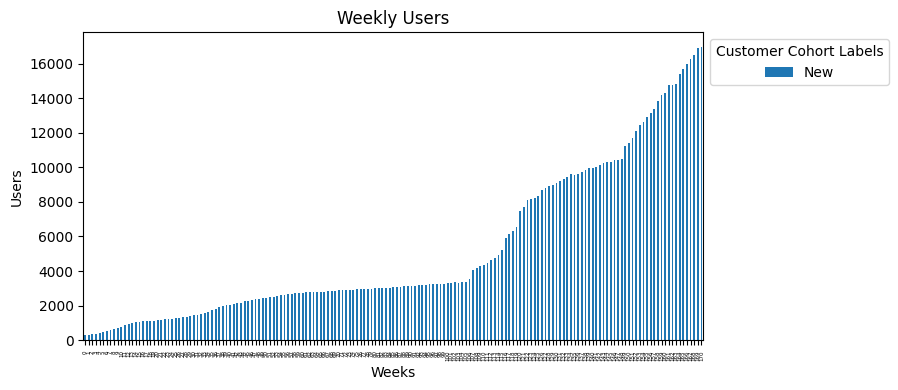

In [41]:
def metric_cohort_graph(metric, cohort):
    if metric in Line_Chart_Variable_List_Customer:
        column_df = pd.DataFrame({week: df[metric].tolist() for week, df in weeklyusersegsats.items()})
        column_df.index = user_cohort_labels
        column_transposed = column_df.transpose()
        each_metric_df[metric] = column_transposed[cohort]  # Select only the specified cohort column

        # Replace zero values with np.nan
        each_metric_df[metric] = np.where(each_metric_df[metric] == 0, np.nan, each_metric_df[metric])

        plt.plot(column_transposed.index, each_metric_df[metric], label=cohort)
        plt.xlabel('Weeks')
        plt.ylabel(metric)
        plt.title(f'Weekly {metric}')
        plt.xticks(fontsize=4, rotation=90)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Customer Cohort Labels')
        plt.show()

    if metric in Stack_Chart_Variable_List_Customer:
        variable_df = pd.DataFrame({week: df[metric].tolist() for week, df in weeklyusersegsats.items()})
        variable_df.index = user_cohort_labels
        variable_df_transposed = variable_df.transpose()
        each_metric_df[metric] = variable_df_transposed[cohort]  # Select only the specified cohort column

        # Replace zero values with np.nan
        each_metric_df[metric] = np.where(each_metric_df[metric] == 0, np.nan, each_metric_df[metric])

        graph2 = pd.DataFrame({cohort: each_metric_df[metric]})
        graph2.plot(kind='bar', stacked=True, figsize=(8, 4))
        plt.title(f'Weekly {metric}')
        plt.xticks(fontsize=4)
        plt.xlabel('Weeks')
        plt.ylabel(metric)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Customer Cohort Labels')
        plt.show()

# Call the function with the specified metric and cohort
output = metric_cohort_graph('Users', 'New')
